In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [4]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [7]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [8]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [9]:
df.shape

(614, 13)

In [10]:
df.drop(columns=['Loan_ID'],inplace = True)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Dependents'] = le.fit_transform(df['Dependents'])

In [13]:
df['Property_Area'].unique()

array([2, 0, 1])

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [15]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

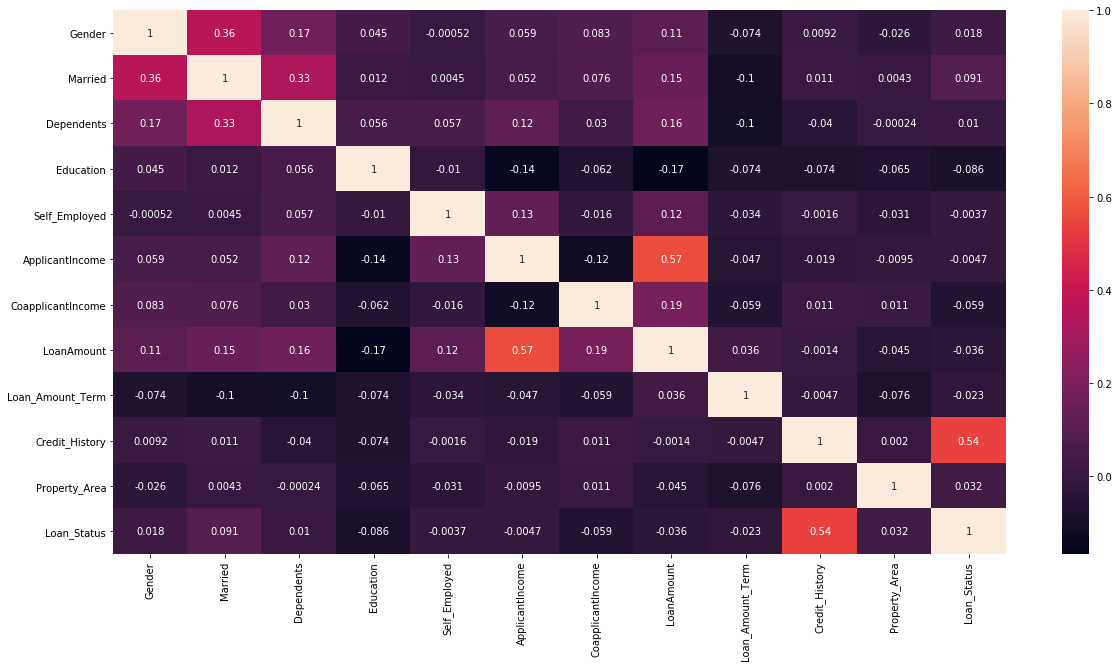

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)

## univariant(categorical and ordinal)

In [18]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

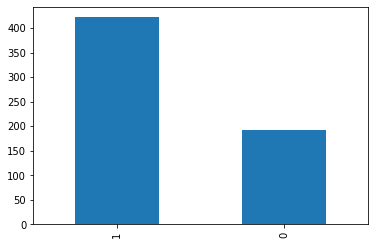

In [20]:
df["Loan_Status"].value_counts().plot.bar()

In [21]:
df["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

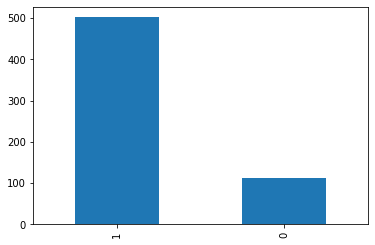

In [22]:
df["Gender"].value_counts().plot.bar()

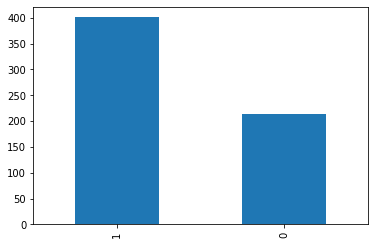

In [23]:
df["Married"].value_counts().plot.bar()

In [24]:
df["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

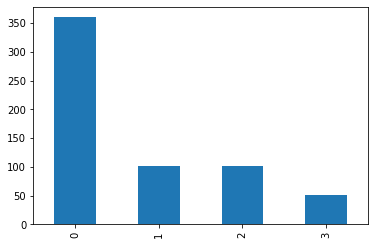

In [25]:
df["Dependents"].value_counts().plot.bar()

In [26]:
df["Education"].value_counts()

0    480
1    134
Name: Education, dtype: int64

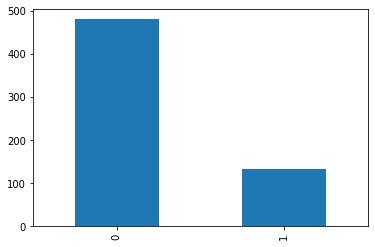

In [27]:
df["Education"].value_counts().plot.bar()

In [28]:
df["Self_Employed"].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

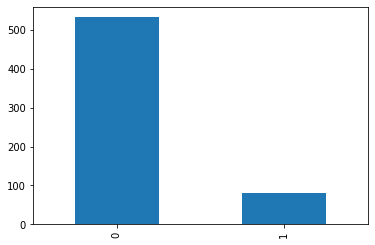

In [29]:
df["Self_Employed"].value_counts().plot.bar()

In [30]:
df["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

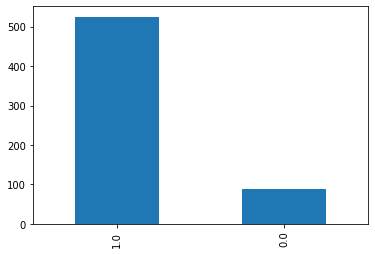

In [31]:
df["Credit_History"].value_counts().plot.bar()

In [32]:
df["Property_Area"].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

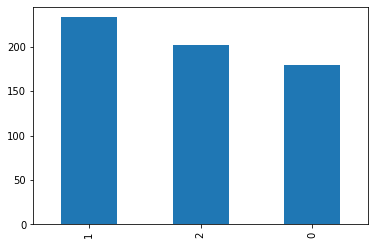

In [33]:
df["Property_Area"].value_counts().plot.bar()

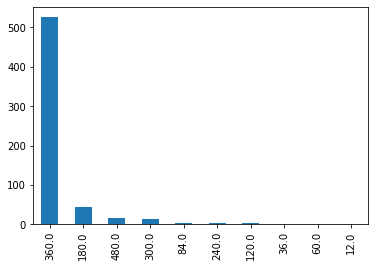

In [34]:
df["Loan_Amount_Term"].value_counts().plot.bar()

### Numerical

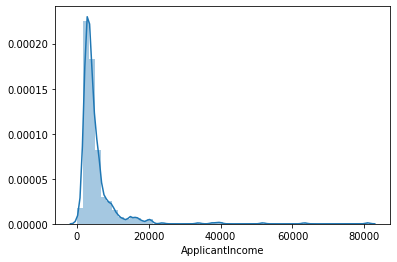

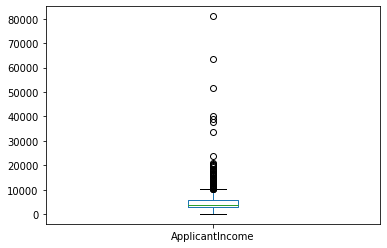

In [35]:
sns.distplot(df["ApplicantIncome"])
plt.show()
df["ApplicantIncome"].plot.box()
plt.show()

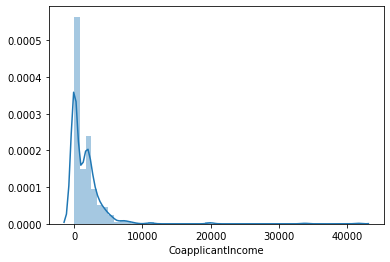

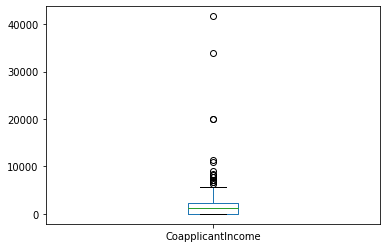

In [36]:
sns.distplot(df["CoapplicantIncome"])
plt.show()
df["CoapplicantIncome"].plot.box()
plt.show()

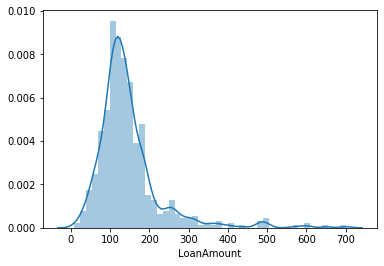

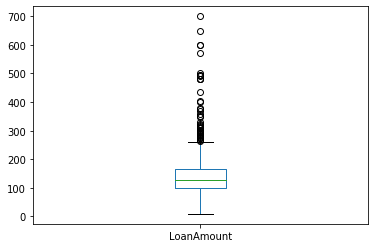

In [37]:
sns.distplot(df["LoanAmount"])
plt.show()
df["LoanAmount"].plot.box()
plt.show()

## Bivariate

In [38]:
Gender=pd.crosstab(df["Gender"],df['Loan_Status'])

In [39]:
Gender

Loan_Status,0,1
Gender,,
0,37,75
1,155,347


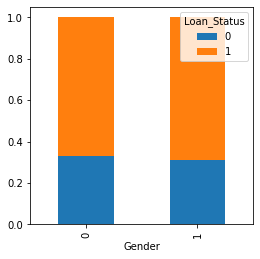

In [40]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

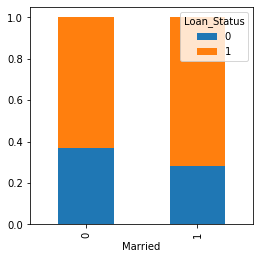

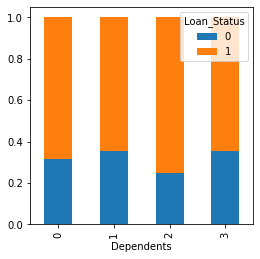

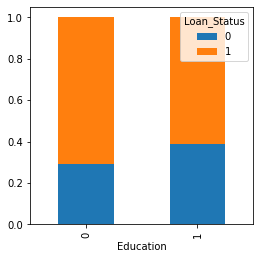

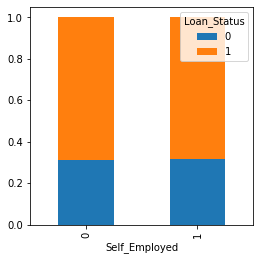

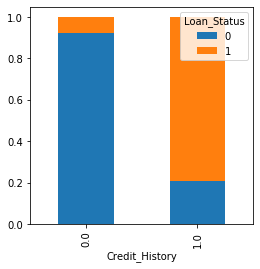

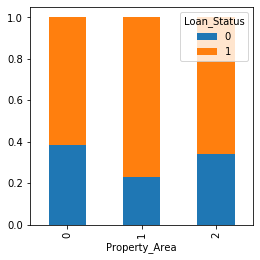

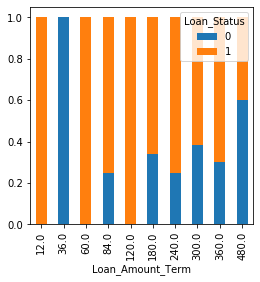

In [41]:
Gender=pd.crosstab(df["Married"],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Gender=pd.crosstab(df["Dependents"],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Gender=pd.crosstab(df["Education"],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Gender=pd.crosstab(df["Self_Employed"],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Gender=pd.crosstab(df["Credit_History"],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Gender=pd.crosstab(df["Property_Area"],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Gender=pd.crosstab(df["Loan_Amount_Term"],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

above 0 is No in and 1 is yes loan status

In [42]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [44]:
df['Total_Income_log']=np.log(df['Total_Income'])

In [45]:
df['LoanAmount']=np.log(df['LoanAmount'])  

In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,1,0,0,0,0,5849,0.0,4.986426,360.0,1.0,2,1,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1,6000.0,8.699515


In [47]:
new_df=df.drop(["ApplicantIncome","CoapplicantIncome","Total_Income"],axis=1)

In [48]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_log
0,1,0,0,0,0,4.986426,360.0,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,360.0,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,360.0,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,360.0,1.0,2,1,8.699515


In [49]:
x=new_df.iloc[:,np.r_[0:9,10]]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income_log
0,1,0,0,0,0,4.986426,360.0,1.0,2,8.674026
1,1,1,1,0,0,4.852030,360.0,1.0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1.0,2,8.006368
3,1,1,0,1,0,4.787492,360.0,1.0,2,8.505323
4,1,0,0,0,0,4.948760,360.0,1.0,2,8.699515


In [50]:
y=new_df.iloc[:,np.r_[9:10]]
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print('xtrain shape--->',x_train.shape)
print('ytrain shape--->',y_train.shape)
print('xtest shape--->',x_test.shape)
print('ytest shape--->',y_test.shape)

xtrain shape---> (491, 10)
ytrain shape---> (491, 1)
xtest shape---> (123, 10)
ytest shape---> (123, 1)


In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [60]:
#model building  
from sklearn.tree import DecisionTreeClassifier
DTclassifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
DTclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
y_pred=DTclassifier.predict(x_test)

In [62]:
from sklearn import metrics
print("the accuracy is: ",metrics.accuracy_score(y_pred,y_test))

the accuracy is:  0.7317073170731707


In [63]:
from sklearn.naive_bayes import GaussianNB
Gauss=GaussianNB()
Gauss.fit(x_train,y_train)

C:\Users\sahu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [65]:
y_predG=Gauss.predict(x_test)

In [66]:
from sklearn import metrics
print("the accuracy is: ",metrics.accuracy_score(y_predG,y_test))

the accuracy is:  0.7723577235772358
